In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(f"Tensorflow version : {tf.__version__}")

Tensorflow version : 2.17.0


In [3]:
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

In [4]:
y_train = train_df['label'].values
x_train = train_df.drop('label', axis =1).values

y_test = train_df['label'].values
x_test = train_df.drop('label', axis =1).values

In [5]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_categorical = to_categorical(y_train,10)
Y_test_categorical = to_categorical(y_test, 10)

print(f"X_train reshaped to: {x_train.shape}")
print(f"y_train_categorical shape: {y_train_categorical.shape}")
print(f"Data loading and preprocessing complete.")

X_train reshaped to: (60000, 28, 28, 1)
y_train_categorical shape: (60000, 10)
Data loading and preprocessing complete.


In [1]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

print("\nModel Architecture: ")
model.summary()

NameError: name 'Sequential' is not defined

In [8]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= 'adam',
              metrics =['accuracy'])

In [9]:
BATCH_SIZE = 128
EPOCHS = 12

print(f"\nStarting training for {EPOCHS} epochs...")

history = model.fit(x_train, y_train_categorical,
                    epochs=5,
                    verbose=1,
                    validation_data = (x_test,Y_test_categorical))
print("Training finished.")


Starting training for 12 epochs...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8886 - loss: 0.3560 - val_accuracy: 0.9868 - val_loss: 0.0422
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9842 - loss: 0.0484 - val_accuracy: 0.9852 - val_loss: 0.0457
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9894 - loss: 0.0322 - val_accuracy: 0.9940 - val_loss: 0.0195
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9927 - loss: 0.0224 - val_accuracy: 0.9947 - val_loss: 0.0156
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9946 - val_loss: 0.0165
Training finished.


In [10]:
### d. Estimating the model's performance
# ---

# 1. Evaluate on Test Data
# model.evaluate() returns the final loss and accuracy on the test set.
print("\nEvaluating model performance on the test set...")
test_loss, test_accuracy = model.evaluate(x_test, Y_test_categorical, verbose=0)

# Print the final results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Evaluating model performance on the test set...
Test Loss: 0.0165
Test Accuracy: 99.46%


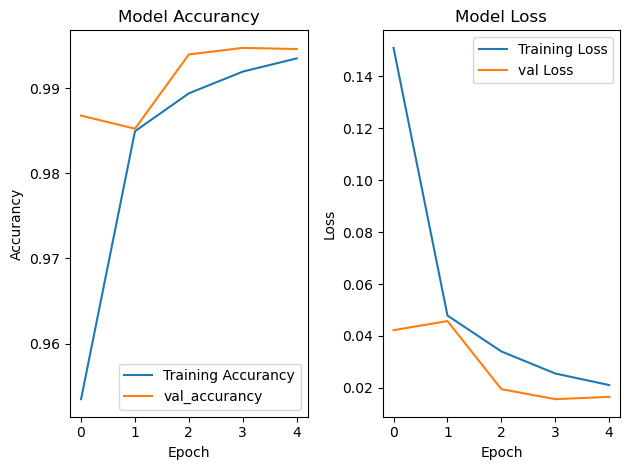

In [11]:
plt.figure(figure=(12,5))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'],label='Training Accurancy')

plt.plot(history.history['val_accuracy'], label='val_accurancy')

plt.title('Model Accurancy')
plt.xlabel('Epoch')
plt.ylabel('Accurancy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = 'Training Loss')

plt.plot(history.history['val_loss'],label = 'val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()